# Los Angeles skyline

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.


# **The Data**

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

**crimes.csv**



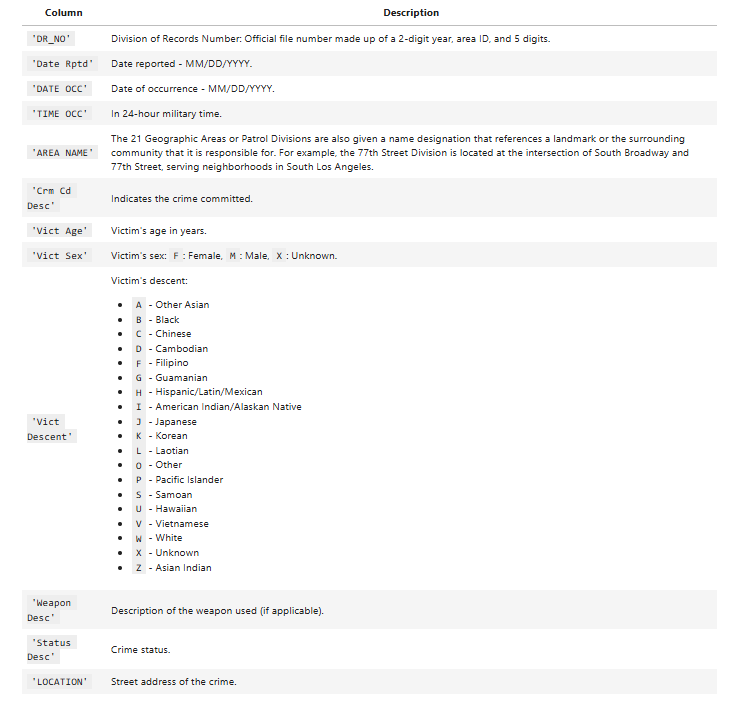


In [ ]:
!pip install py7zr

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Path to the file
crimes = pd.read_csv("/content/crimes.csv" , header=0 , sep=",")

In [ ]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [ ]:
crimes.shape

(185715, 12)

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


# Questions

1. Highest Freq Hr: peak_crime_hour
2. HF Night crime Area: peak_night_crime_location
3. Crime count w/ age grps: victim_ages

#Task 1

##Highest Frequent Crime Hour : peak_crime_hour

In [ ]:
print(crimes["TIME OCC"])

0         1110
1         1620
2         1200
3          635
4          900
          ... 
185710    1100
185711    1800
185712    1000
185713    1630
185714     900
Name: TIME OCC, Length: 185715, dtype: int64


We can either count entries of data in hourly intervals individually, or modify column 'TIME OCC' into a general hour group format

Taking approach 2: Changing the time column to denote the nearest lower integer


*  Ideal to start by creating a new data-frame for 'TIME OCC" column
*  Further, to simplistically reach the nearest lower integer, dividing by 100 reduces the value to only two significant digits, thereby using casting to achieve the goal




In [ ]:
df = crimes[["TIME OCC"]]

n=df.shape[0]
for i in range(n):
  df.at[i,"TIME OCC"] = int(df.at[i,"TIME OCC"])/100

print(df)

/tmp/ipython-input-590035096.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i,"TIME OCC"] = int(df.at[i,"TIME OCC"])/100


        TIME OCC
0          11.10
1          16.20
2          12.00
3           6.35
4           9.00
...          ...
185710     11.00
185711     18.00
185712     10.00
185713     16.30
185714      9.00

[185715 rows x 1 columns]


Conveniently we can get column values against their number of occurences in a series format through df['column'].value_counts(). Here, converting into a dictionary is ideal for further use.

In [ ]:
hr_grp=df['TIME OCC'].value_counts().to_dict()

print(hr_grp)

{12.0: 6462, 18.0: 3991, 20.0: 3769, 17.0: 3754, 0.01: 3587, 19.0: 3406, 22.0: 3394, 21.0: 3338, 16.0: 3238, 15.0: 3165, 8.0: 3143, 10.0: 3025, 14.0: 2990, 11.0: 2798, 23.0: 2756, 13.0: 2657, 9.0: 2508, 1.0: 2159, 18.3: 1936, 17.3: 1896, 19.3: 1833, 20.3: 1816, 22.3: 1774, 15.3: 1764, 2.0: 1757, 21.3: 1755, 6.0: 1746, 16.3: 1720, 7.0: 1697, 12.3: 1598, 14.3: 1598, 11.3: 1553, 10.3: 1511, 13.3: 1508, 3.0: 1477, 23.3: 1471, 8.3: 1285, 9.3: 1265, 0.3: 1169, 4.0: 1098, 5.0: 1061, 7.3: 1000, 1.3: 982, 2.3: 811, 6.3: 790, 3.3: 657, 0.05: 652, 5.3: 619, 4.3: 590, 11.45: 566, 12.15: 555, 17.45: 553, 16.45: 552, 19.45: 550, 18.45: 547, 12.45: 541, 15.2: 530, 15.45: 526, 15.15: 504, 16.15: 495, 13.45: 492, 10.45: 490, 17.15: 486, 20.45: 485, 14.45: 485, 20.15: 480, 18.15: 473, 13.15: 464, 19.15: 464, 11.15: 461, 14.2: 460, 12.5: 459, 17.2: 456, 21.45: 455, 14.15: 453, 16.2: 450, 17.5: 444, 9.45: 441, 18.4: 441, 21.15: 439, 0.1: 438, 13.2: 438, 12.2: 438, 10.15: 433, 17.4: 432, 15.5: 432, 22.15: 

The following code block has variable:

* l: List of values of the dictionary
* i: Index of the maximum value in the dictionary, asessed through |
* hr: the hour associated with highest crime frequency, retrived by using i on
the list of keys of the dictionary
* peak_crime_hour: is assigned to hr




In [ ]:
l=list(hr_grp.values())
i=l.index(max(l))
hr=list(hr_grp.keys())[i]
#hr=int(hr)


peak_crime_hour= hr
print(peak_crime_hour)

12.0


#Task 2

##HF Night crime Area: peak_night_crime_location

Since we have to understand crime frequency in areas as per a time restriction, creating a dataframe of variables 'AREA NAME' & 'TIME OCC' is apt.

df2['TIME OCC']=df['TIME OCC'] is done to ensure that the hourly gap format of timing from Task 1 follows in this Task as well for convenience.

Lastly, the data has been filtered based on the time restriction, i.e 2200-0000 & 0000-0400 (10pm to 3:59am)

In [ ]:
df2=crimes[['AREA NAME', 'TIME OCC']]
df2['TIME OCC']=df['TIME OCC']

df3=df2[(df2['TIME OCC']>=22) | (df2['TIME OCC']<4)]
print(df3)

          AREA NAME  TIME OCC
8       77th Street      0.01
10       Devonshire      1.55
30           Newton      0.01
33           Newton     23.05
36         Foothill      0.01
...             ...       ...
185687       Newton     22.00
185695  77th Street     23.00
185700       Newton     22.03
185701     Van Nuys     22.43
185704   Devonshire      2.00

[39183 rows x 2 columns]


/tmp/ipython-input-1198862951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TIME OCC']=df['TIME OCC']


As done in the previous Task, to get a count of number of crimes in each region, .value_counts().to_dict() is used. In a similar fashion, the region with maximum crime is obtained.

In [ ]:
area = df2['AREA NAME'].value_counts().to_dict()
#print(area)

l=list(area.values())
mfi=l.index(max(l))

l=list(area.keys())
peak_night_crime_location=l[mfi]
# print(area)
# print(peak_night_crime_location)

#Task 3

#Crime count w/ age grps: victim_ages
A: dataframe of variable 'Vict Age' l: list of lower limit of age groups

In order to get the count of ages satisfying a certain condition, filtering of dataframes can be performed o,k: gives the count of elements in respective dataframes with the help of .shape[0] s: String element denoting age range

In [ ]:
A=crimes[['Vict Age']]

dic={}
l=[0,18,26,35,45,55,65]
for i in range(len(l)):
    if l[i]==65:
        o=df[(l[i]<=A['Vict Age'])].shape[0]

        s=str(l[i])+"+"

        dic[s]=o
        break

    k=df[(l[i] <= A['Vict Age']) & (A['Vict Age'] <= (l[i+1]-1))].shape[0]

    s=str(l[i])+'-'+str(l[i+1]-1)
    dic[s]=k

#print(dic)

victim_ages=pd.Series(dic)
print(victim_ages)

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
dtype: int64
